# Summer Olympics Data Analysis Assignment

In [1]:
import pandas as pd

In [108]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [142]:
%matplotlib inline

In [2]:
df=pd.read_csv("summer.csv")

In [76]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [5]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [6]:
df.describe()

,Year
count,31165.000000
mean,1970.482785
std,33.158416
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


In [7]:
df.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')

### 1. In how many cities Summer Olympics is held so far?

In [140]:
cities=df['City'].unique()

print(len(cities))

22


### 2. Which sport is having most number of Gold Medals so far? (Top 5)

In [123]:
df2=df[df["Medal"]=="Gold"].groupby(by="Sport").count().sort_values(by="Medal",ascending=False)
df2.head(5)

,Year,City,Discipline,Athlete,Country,Gender,Event,Medal
Sport,,,,,,,,
Aquatics,1421,1421,1421,1421,1421,1421,1421,1421
Athletics,1215,1215,1215,1215,1214,1215,1215,1215
Rowing,890,890,890,890,890,890,890,890
Gymnastics,820,820,820,820,820,820,820,820
Fencing,552,552,552,552,552,552,552,552


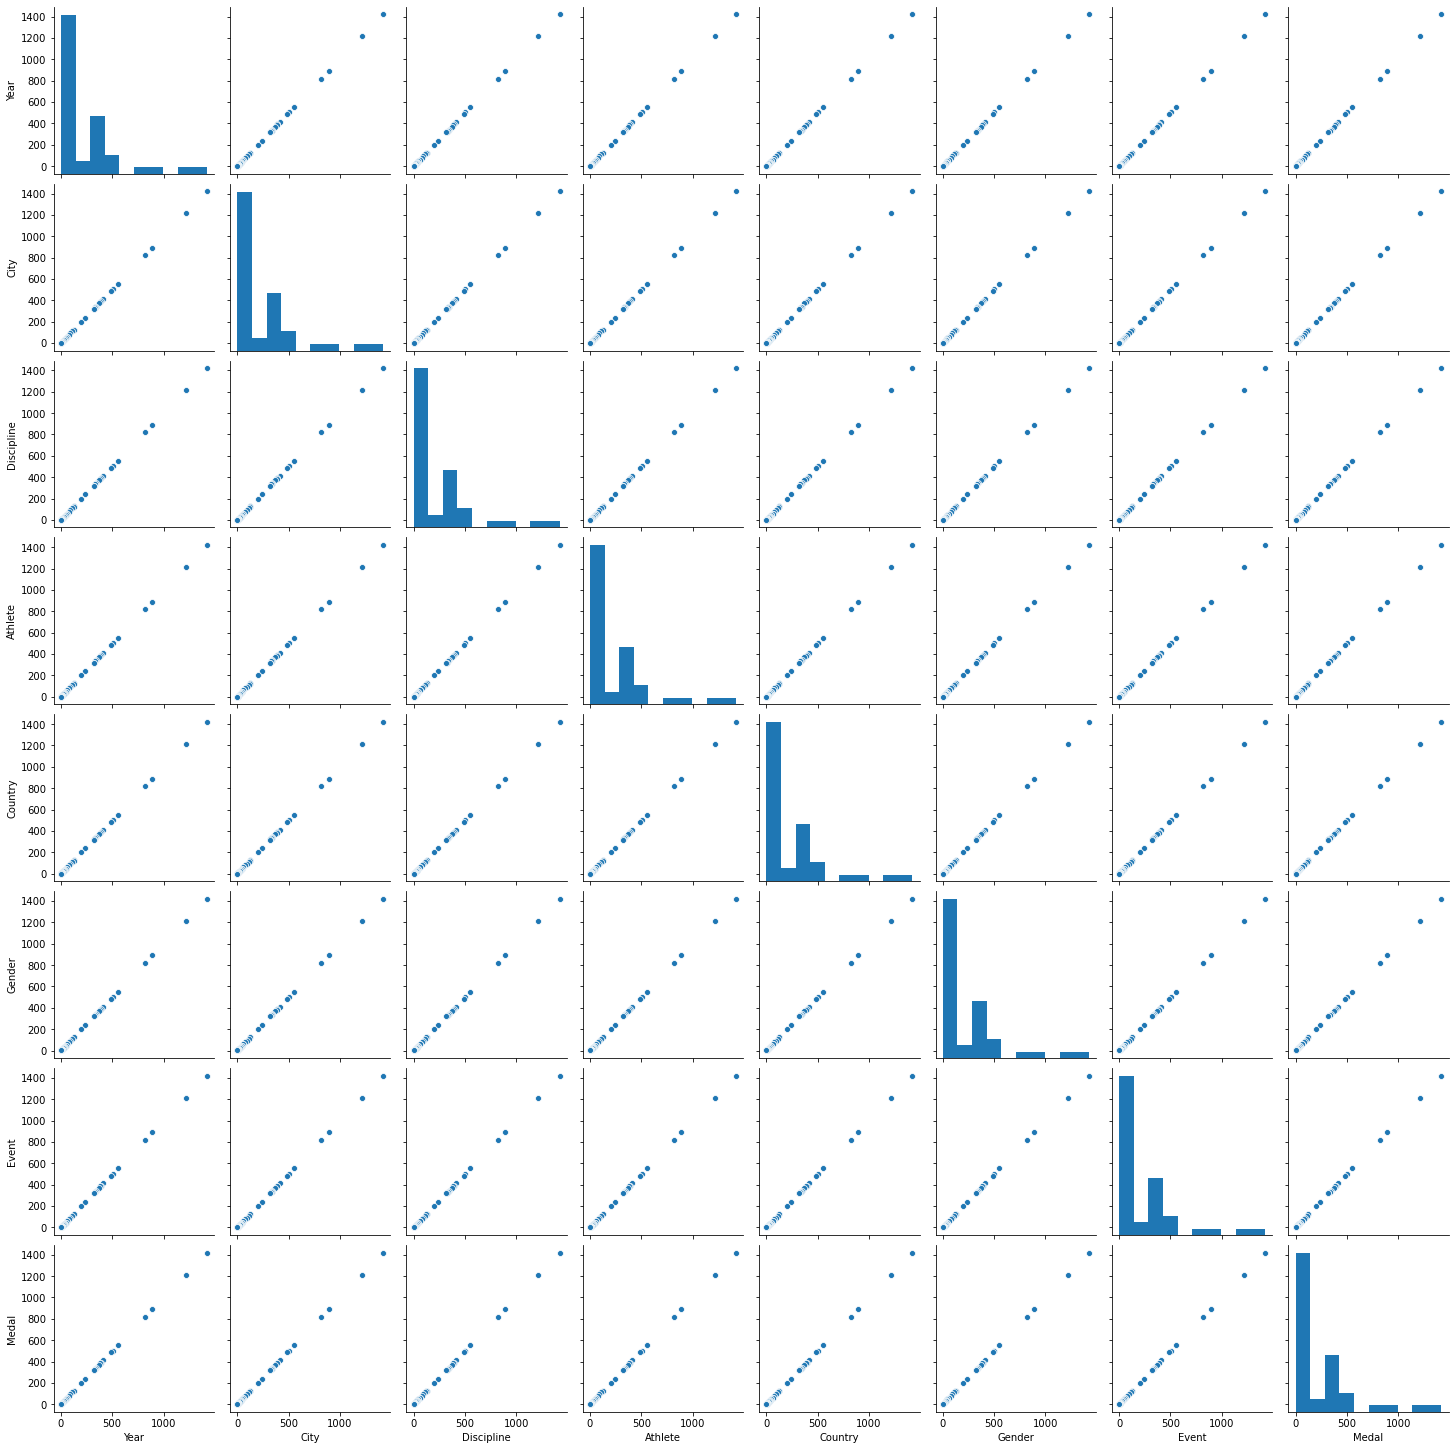

In [148]:
sns.pairplot(df2)

In [159]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


<BarContainer object of 27 artists>

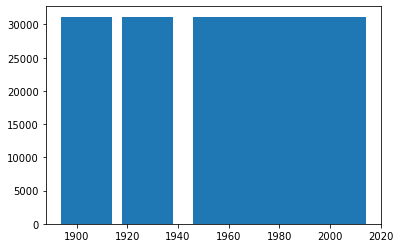

In [166]:
plt.bar(x=df["Year"].unique(),height=df["Medal"].count(),width=4,align="center")

### 3. Which sport is having most number of medals so far? (Top 5)

In [122]:
df3=df.groupby(by="Sport").count().sort_values(by="Medal",ascending=False)
df3.head(5)

,Year,City,Discipline,Athlete,Country,Gender,Event,Medal
Sport,,,,,,,,
Aquatics,4170,4170,4170,4170,4170,4170,4170,4170
Athletics,3638,3638,3638,3638,3637,3638,3638,3638
Rowing,2667,2667,2667,2667,2667,2667,2667,2667
Gymnastics,2307,2307,2307,2307,2307,2307,2307,2307
Fencing,1613,1613,1613,1613,1613,1613,1613,1613


### 4. Which player has won most number of medals? (Top 5)

In [120]:
player=df.groupby(by="Athlete").count().sort_values(by="Medal",ascending=False)
player.head()

,Year,City,Sport,Discipline,Country,Gender,Event,Medal
Athlete,,,,,,,,
"PHELPS, Michael",22,22,22,22,22,22,22,22
"LATYNINA, Larisa",18,18,18,18,18,18,18,18
"ANDRIANOV, Nikolay",15,15,15,15,15,15,15,15
"MANGIAROTTI, Edoardo",13,13,13,13,13,13,13,13
"ONO, Takashi",13,13,13,13,13,13,13,13


In [96]:
df.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')

### 5. Which player has won most number Gold Medals of medals? (Top 5)

In [121]:
df5=df[df["Medal"]=="Gold"].groupby(by="Athlete").count().sort_values(by="Medal",ascending=False)
df5.head(5)

,Year,City,Sport,Discipline,Country,Gender,Event,Medal
Athlete,,,,,,,,
"PHELPS, Michael",18,18,18,18,18,18,18,18
"LEWIS, Carl",9,9,9,9,9,9,9,9
"NURMI, Paavo",9,9,9,9,9,9,9,9
"SPITZ, Mark",9,9,9,9,9,9,9,9
"LATYNINA, Larisa",9,9,9,9,9,9,9,9


### 6. In which year India won first Gold Medal in Summer Olympics?

In [136]:
df6=df[(df["Medal"]=="Gold") & (df['Country']=="IND")].sort_values(by="Year")

print(df6.head(1)['Year'])

df6.head(5)

5512    1928
Name: Year, dtype: int64


,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold
5526,1928,Amsterdam,Hockey,Hockey,"YUSUF, Sayed Mohamed",IND,Men,Hockey,Gold
5525,1928,Amsterdam,Hockey,Hockey,"SINGH, Jaipal",IND,Men,Hockey,Gold
5524,1928,Amsterdam,Hockey,Hockey,"SHAUKAT, Ali",IND,Men,Hockey,Gold
5523,1928,Amsterdam,Hockey,Hockey,"SEAMAN, Frederic S.",IND,Men,Hockey,Gold


### 7. Which event is most popular in terms on number of players? (Top 5)

In [137]:
df7=df.groupby(by="Event").count().sort_values(by="Athlete",ascending=False)
df7.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Medal
Event,,,,,,,,
Football,1497,1497,1497,1497,1497,1497,1497,1497
Hockey,1422,1422,1422,1422,1422,1422,1422,1422
Team Competition,1147,1147,1147,1147,1147,1147,1147,1147
Basketball,1012,1012,1012,1012,1012,1012,1012,1012
Handball,973,973,973,973,973,973,973,973


### 8. Which sport is having most female Gold Medalists? (Top 5)

In [138]:
df11=df[(df["Gender"]=="Women") & (df["Medal"]=='Gold')].groupby(by="Sport").count().sort_values(by="Athlete",ascending=False)
df11.head()

,Year,City,Discipline,Athlete,Country,Gender,Event,Medal
Sport,,,,,,,,
Aquatics,589,589,589,589,589,589,589,589
Athletics,389,389,389,389,388,389,389,389
Gymnastics,268,268,268,268,268,268,268,268
Rowing,217,217,217,217,217,217,217,217
Volleyball,166,166,166,166,166,166,166,166
